In [91]:
#Read in the Excel Spreadsheet

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np


PR_file_path = 'nsf_2d_workshop_2018/SmB6_data/PRX_Publication/Figure_6a.xlsx'

PR_excel = pd.ExcelFile(PR_file_path)

print(PR_excel.sheet_names)

['Pub-1_Figure-6a-SmB6', 'Pub-1_Figure-6a-SmB6-C-5']


In [2]:
#load the sheet for fig 1 into a pandas data frame

Fig6_df = PR_excel.parse(PR_excel.sheet_names[0])

Fig6_df

,T,T2,Cp,Cp.1,Cp/T,Cp/T.1,T_AVE,Cp.2,Cp_AVE,Cp/T_AVE,...,Cp.6,Cp/T.4,Cp/T.5,Unnamed: 25,T.3,T2.3,Cp.7,Cp.8,Cp/T.6,Cp/T.7
0,K,K2,microJ/K,mJ/g K,mJ/g K2,mJ/mol K2,K,mJ/mol K2,mJ/mol K2,mJ/mol K2,...,mJ/g K,mJ/g K2,mJ/mol K2,NaN,K,K2,microJ/K,mJ/g K,mJ/g K2,mJ/mol K2
1,Exp5_0T,Exp5_0T,Exp5_0T,Exp5_0T,Exp5_0T,Exp5_0T,Exp5_0T,Exp5_0T,Exp5_0T,Exp5_0T,...,Exp5_5T,Exp5_5T,Exp5_5T,NaN,Exp5_9T,Exp5_9T,Exp5_9T,Exp5_9T,Exp5_9T,Exp5_9T
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.03049,4.12289,2.0494,0.32843,0.16175,34.8125,2.03022,70.6864,69.1994,34.0847,...,0.33585,0.16508,35.5296,NaN,2.01876,4.07538,2.09412,0.3356,0.16624,35.779
4,2.03016,4.12155,2.04253,0.32733,0.16123,34.7015,2.22017,70.4495,72.27,32.5516,...,0.33461,0.16447,35.3976,NaN,2.01849,4.0743,2.1504,0.34462,0.17073,36.7454
5,2.03,4.1209,1.92693,0.3088,0.15212,32.7401,2.03241,66.4624,67.8216,33.3701,...,0.33818,0.16621,35.7717,NaN,2.0186,4.07473,2.11376,0.33874,0.16781,36.1174
6,2.21951,4.92621,2.10363,0.33712,0.15189,32.6906,2.21936,72.557,73.6457,33.1833,...,0.35643,0.16085,34.619,NaN,2.19717,4.82755,2.24684,0.36007,0.16388,35.2711
7,2.21967,4.92693,2.14309,0.34344,0.15473,33.3014,2.39759,73.9181,77.3457,32.2598,...,0.36007,0.16252,34.9775,NaN,2.19715,4.82746,2.30486,0.36937,0.16811,36.1823
8,2.22132,4.93428,2.0392,0.3268,0.14712,31.6635,2.57724,70.3349,79.6954,30.9228,...,0.35787,0.16154,34.7686,NaN,2.19699,4.82675,2.24209,0.35931,0.16355,35.1995
9,2.03259,4.13142,1.94844,0.31225,0.15362,33.0633,2.76242,67.2042,86.659,31.3706,...,0.38734,0.1619,34.8458,NaN,2.37646,5.64758,2.43187,0.38972,0.16399,35.2955


In [4]:
Fig6_df.columns

Index(['T', 'T2', 'Cp', 'Cp.1', 'Cp/T', 'Cp/T.1', 'T_AVE', 'Cp.2', 'Cp_AVE',
       'Cp/T_AVE', '1st derivative of "Cp/T_AVE"', 'Unnamed: 11', 'T.1',
       'T2.1', 'Cp.3', 'Cp.4', 'Cp/T.2', 'Cp/T.3', 'Unnamed: 18', 'T.2',
       'T2.2', 'Cp.5', 'Cp.6', 'Cp/T.4', 'Cp/T.5', 'Unnamed: 25', 'T.3',
       'T2.3', 'Cp.7', 'Cp.8', 'Cp/T.6', 'Cp/T.7'],
      dtype='object')

In [6]:
#def mask(df, key, value):
#    return df[df[key] != value]

#pd.DataFrame.mask = mask

trimmed = Fig6_df.drop([0,1,2])

#for column in trimmed.columns:
#    trimmed = trimmed.mask(column, '--')
    
trimmed

,T,T2,Cp,Cp.1,Cp/T,Cp/T.1,T_AVE,Cp.2,Cp_AVE,Cp/T_AVE,...,Cp.6,Cp/T.4,Cp/T.5,Unnamed: 25,T.3,T2.3,Cp.7,Cp.8,Cp/T.6,Cp/T.7
3,2.03049,4.12289,2.0494,0.32843,0.16175,34.8125,2.03022,70.6864,69.1994,34.0847,...,0.33585,0.16508,35.5296,NaN,2.01876,4.07538,2.09412,0.3356,0.16624,35.779
4,2.03016,4.12155,2.04253,0.32733,0.16123,34.7015,2.22017,70.4495,72.27,32.5516,...,0.33461,0.16447,35.3976,NaN,2.01849,4.0743,2.1504,0.34462,0.17073,36.7454
5,2.03,4.1209,1.92693,0.3088,0.15212,32.7401,2.03241,66.4624,67.8216,33.3701,...,0.33818,0.16621,35.7717,NaN,2.0186,4.07473,2.11376,0.33874,0.16781,36.1174
6,2.21951,4.92621,2.10363,0.33712,0.15189,32.6906,2.21936,72.557,73.6457,33.1833,...,0.35643,0.16085,34.619,NaN,2.19717,4.82755,2.24684,0.36007,0.16388,35.2711
7,2.21967,4.92693,2.14309,0.34344,0.15473,33.3014,2.39759,73.9181,77.3457,32.2598,...,0.36007,0.16252,34.9775,NaN,2.19715,4.82746,2.30486,0.36937,0.16811,36.1823
8,2.22132,4.93428,2.0392,0.3268,0.14712,31.6635,2.57724,70.3349,79.6954,30.9228,...,0.35787,0.16154,34.7686,NaN,2.19699,4.82675,2.24209,0.35931,0.16355,35.1995
9,2.03259,4.13142,1.94844,0.31225,0.15362,33.0633,2.76242,67.2042,86.659,31.3706,...,0.38734,0.1619,34.8458,NaN,2.37646,5.64758,2.43187,0.38972,0.16399,35.2955
10,2.03238,4.13058,1.99968,0.32046,0.15768,33.9363,2.94625,68.9715,92.6625,31.451,...,0.38003,0.15884,34.1858,NaN,2.37662,5.64831,2.43464,0.39017,0.16417,35.3335
11,2.03225,4.13006,1.9509,0.31264,0.15384,33.1106,3.13345,67.2892,92.7683,29.6058,...,0.38468,0.16081,34.6107,NaN,2.37687,5.64949,2.4915,0.39928,0.16799,36.1548
12,2.2187,4.92265,2.05151,0.32877,0.14818,31.8922,3.31401,70.7593,97.0306,29.2789,...,0.40698,0.15852,34.1185,NaN,2.55408,6.52333,2.55232,0.40903,0.16015,34.4675


(30, 60)

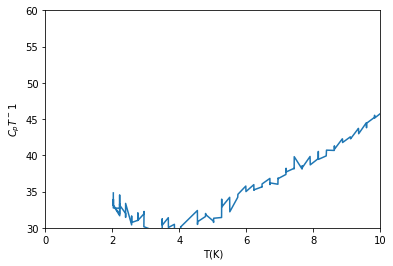

In [9]:
#Pandas' Dataframe wrapper for Matplotlib - slightly difference syntax
ax1 = trimmed.plot(x=trimmed.columns[0], y=trimmed.columns[5], legend=False)

#Regular Matplotlib code
fig = ax1.get_figure()

y_label = r'$C_pT^-1$'
x_label = 'T(K)'
ax1.set_ylabel(y_label)
ax1.set_xlabel(x_label)
ax1.set_xlim(left=0, right=10)
ax1.set_ylim(bottom=30, top=60)


(30, 60)

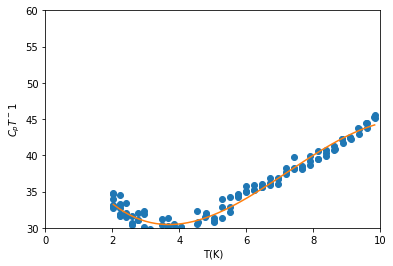

In [93]:
trimmed = trimmed.loc[trimmed['T'] <= 10]

xi = trimmed[trimmed.columns[0]].values.astype('float')
yi = trimmed[trimmed.columns[5]].values.astype('float')

z = np.polyfit(xi, yi, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(xi[0], xi[-1], 50)
y_new = f(x_new)

plt.plot(xi,yi,'o', x_new, y_new)
ax1 = plt.gca()
#Regular Matplotlib code
fig = ax1.get_figure()

y_label = r'$C_pT^-1$'
x_label = 'T(K)'
ax1.set_ylabel(y_label)
ax1.set_xlabel(x_label)
ax1.set_xlim(left=0, right=10)
ax1.set_ylim(bottom=30, top=60)

(30, 60)

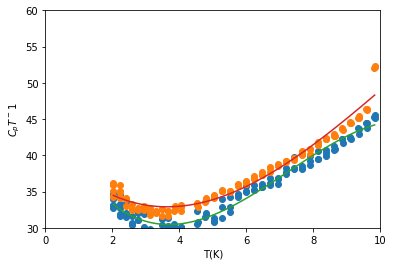

In [116]:
y2 = trimmed[trimmed.columns[17]].values.astype('float')
#y3 = trimmed['Cp/T.7'].values.astype('float')

z2 = np.polyfit(xi, y2, 3)
f2 = np.poly1d(z2)

y2_new = f2(x_new)

plt.plot(xi,yi,'o',xi,y2,'o', x_new, y_new, x_new, y2_new)
ax1 = plt.gca()
#Regular Matplotlib code
fig = ax1.get_figure()

y_label = r'$C_pT^-1$'
x_label = 'T(K)'
ax1.set_ylabel(y_label)
ax1.set_xlabel(x_label)
ax1.set_xlim(left=0, right=10)
ax1.set_ylim(bottom=30, top=60)

In [117]:
y3

array([35.77895, 36.74541, 36.1174 , 35.27105, 36.18232, 35.19948,
       35.29549, 35.33347, 36.15478, 34.46751, 34.80297, 36.01351,
       34.35281, 34.76739, 33.76584, 34.44801, 34.68955, 33.36653,
       33.48118, 32.31197, 33.11351, 32.91673, 33.69638, 33.48093,
       32.49287, 32.71415, 33.2661 , 33.17309, 33.0905 , 32.92729,
       32.61215, 33.39965, 32.80855, 32.51521, 33.27309, 32.65241,
       33.52352, 33.7604 , 33.89238, 33.80633, 33.78186, 34.35071,
       34.40532, 33.83979, 34.71194, 34.86223, 34.96062, 34.806  ,
       35.25589, 35.01574, 35.31818, 35.87785, 35.73232, 35.63472,
       36.80177, 36.20495, 36.70581, 36.86438, 36.8522 , 37.1106 ,
       37.68084, 37.74406, 37.78557, 38.0936 , 38.42105, 38.2941 ,
       38.47171, 39.09806, 38.41732, 39.13241, 39.11035, 39.04491,
       39.4921 , 40.04433, 39.79654, 40.41666, 40.22508, 40.09855,
       41.2348 , 40.74792, 40.76222, 41.39978, 41.11363, 41.32532,
       42.24712, 42.55671, 41.7983 , 42.50075, 42.33094, 42.24